In [1]:
import os
import cv2
import glob
import json
import pprint
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image,ImageOps,ImageDraw,ImageFont
import torch
import torchvision.transforms as transforms

In [2]:
json_path=r'F:\ego_cam_dataset\female_001_a_a\env_003\cam_down\json'
rgba_path=r'F:\ego_cam_dataset\female_001_a_a\env_003\cam_down\rgba'
depth_path=r'F:\ego_cam_dataset\female_001_a_a\env_003\cam_down\depth'
json_list=glob.glob(json_path+'/*.json')
rgba_list=glob.glob(rgba_path+'/*.png')
depth_list=glob.glob(depth_path+'/*.png')
file_num=2000


1280 800


TypeError: 'tuple' object is not callable

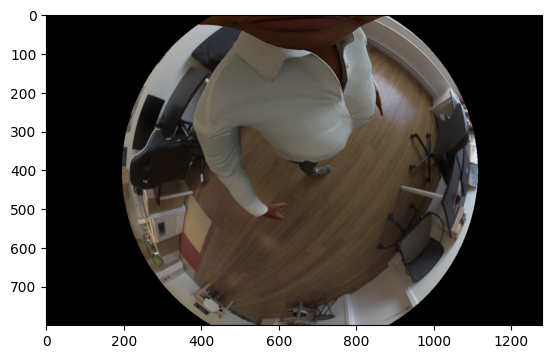

In [3]:
temp_rgbs=rgba_list[file_num]
tempimg=Image.open(temp_rgbs)
print(tempimg.width,tempimg.height)
plt.imshow(tempimg)

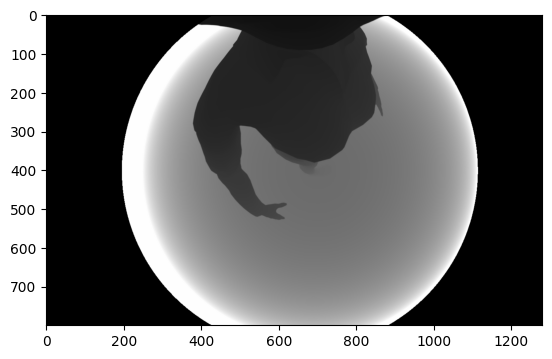

In [ ]:
temp_depth=depth_list[file_num]
tempdepth=Image.open(temp_depth)
plt.imshow(tempdepth)


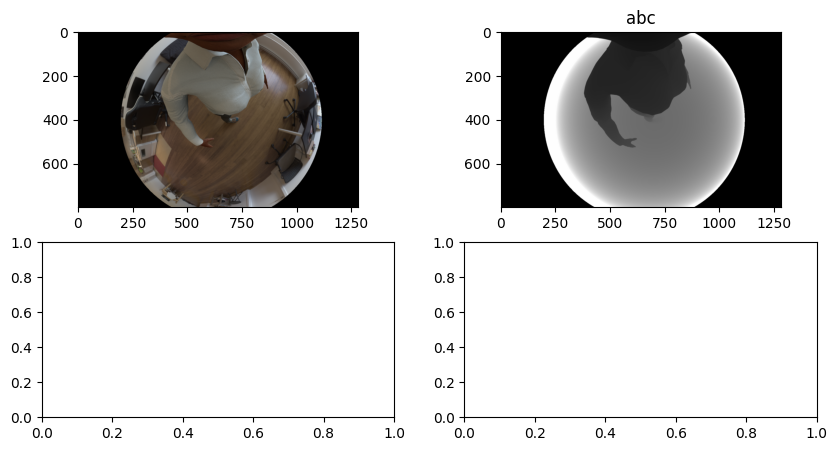

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(10,5))
ax[0][1].imshow(tempdepth)
ax[0][1].set_title('abc')
ax[0][0].imshow(tempimg)

In [ ]:
"""
Convert a PIL Image or numpy.ndarray to tensor. This transform does not support torchscript.

Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) 
in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or 
if the numpy.ndarray has dtype = np.uint8
"""

transform = transforms.Compose([
    transforms.Resize([512,512], Image.BILINEAR),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
temptensor=transform(tempdepth)

# torch.set_printoptions(profile="full")
print(temptensor[2].mean())

tensor(0.3107)


C:\Users\user\AppData\Local\Temp\ipykernel_10164\645580779.py:10: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  transforms.Resize([512,512], Image.BILINEAR),
c:\Users\user\anaconda3\envs\torch_base\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [ ]:
temp_json=None
with open(json_list[file_num],'r') as f:
    temp_json=json.loads(f.read())

for i,val in enumerate(temp_json['joints']):
    print(i,val['name'])


0 mixamorig:Head
1 mixamorig:HeadTop_End
2 mixamorig:Hips
3 mixamorig:LeftArm
4 mixamorig:LeftFoot
5 mixamorig:LeftForeArm
6 mixamorig:LeftHand
7 mixamorig:LeftHandIndex1
8 mixamorig:LeftHandIndex2
9 mixamorig:LeftHandIndex3
10 mixamorig:LeftHandIndex4
11 mixamorig:LeftHandMiddle1
12 mixamorig:LeftHandMiddle2
13 mixamorig:LeftHandMiddle3
14 mixamorig:LeftHandMiddle4
15 mixamorig:LeftHandPinky1
16 mixamorig:LeftHandPinky2
17 mixamorig:LeftHandPinky3
18 mixamorig:LeftHandPinky4
19 mixamorig:LeftHandRing1
20 mixamorig:LeftHandRing2
21 mixamorig:LeftHandRing3
22 mixamorig:LeftHandRing4
23 mixamorig:LeftHandThumb1
24 mixamorig:LeftHandThumb2
25 mixamorig:LeftHandThumb3
26 mixamorig:LeftHandThumb4
27 mixamorig:LeftLeg
28 mixamorig:LeftShoulder
29 mixamorig:LeftToeBase
30 mixamorig:LeftToe_End
31 mixamorig:LeftUpLeg
32 mixamorig:Neck
33 mixamorig:RightArm
34 mixamorig:RightFoot
35 mixamorig:RightForeArm
36 mixamorig:RightHand
37 mixamorig:RightHandIndex1
38 mixamorig:RightHandIndex2
39 mixamo

In [ ]:

def draw_dot(img:Image,coords:list,name:str):
    img_draw=ImageDraw.Draw(img)
    img
    for i,(h_,w_) in enumerate(zip(coords[1],coords[0])):
        img_draw.ellipse([(w_-5,h_-5),(w_+5,h_+5)],fill=(255, 0, 0),width=3)
        img_draw.text((w_,h_+10),str(i),fill=(0,255,0),font=ImageFont.truetype('arial.ttf',20))

    return img     


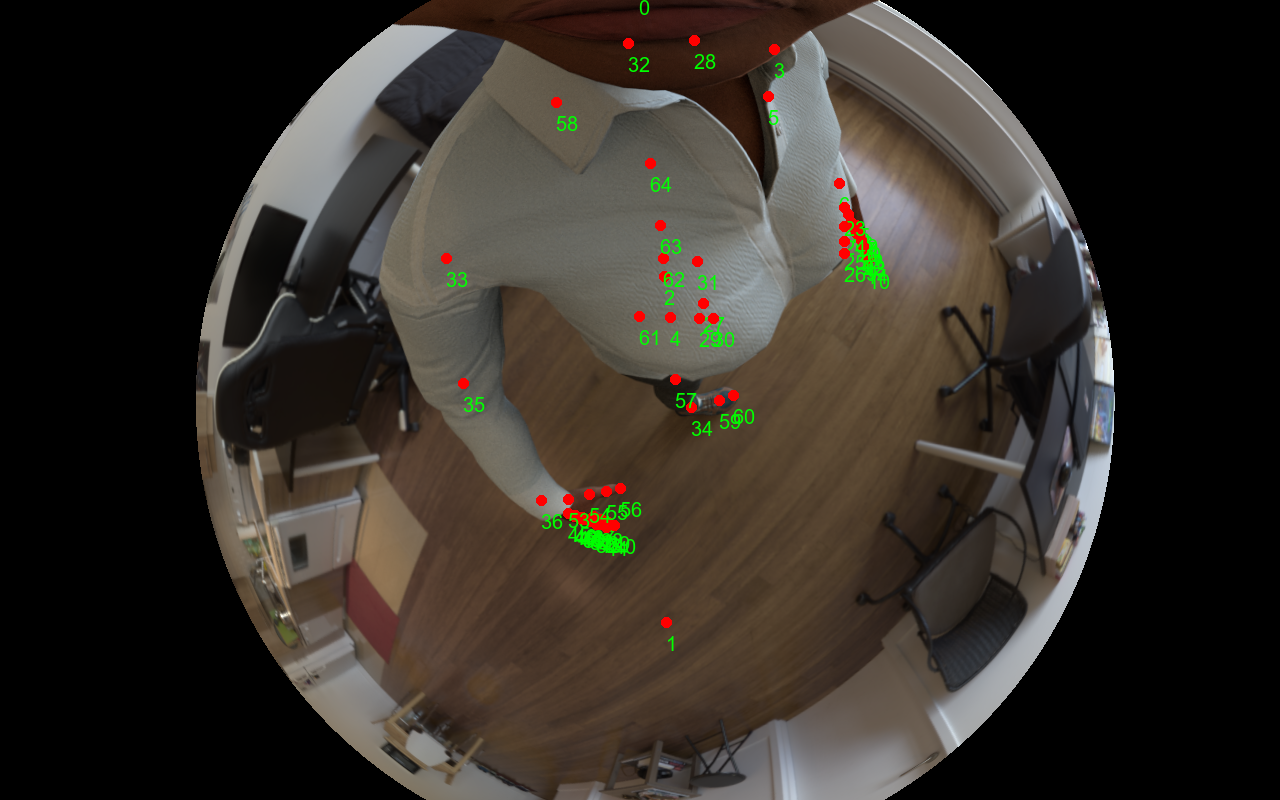

In [ ]:
temp_2d_coords=temp_json['pts2d_fisheye']
tempimg=Image.open(temp_rgbs)
draw_dot(tempimg,temp_2d_coords,'None')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.690557531073651 -21.078655673360473 56.88072244405876


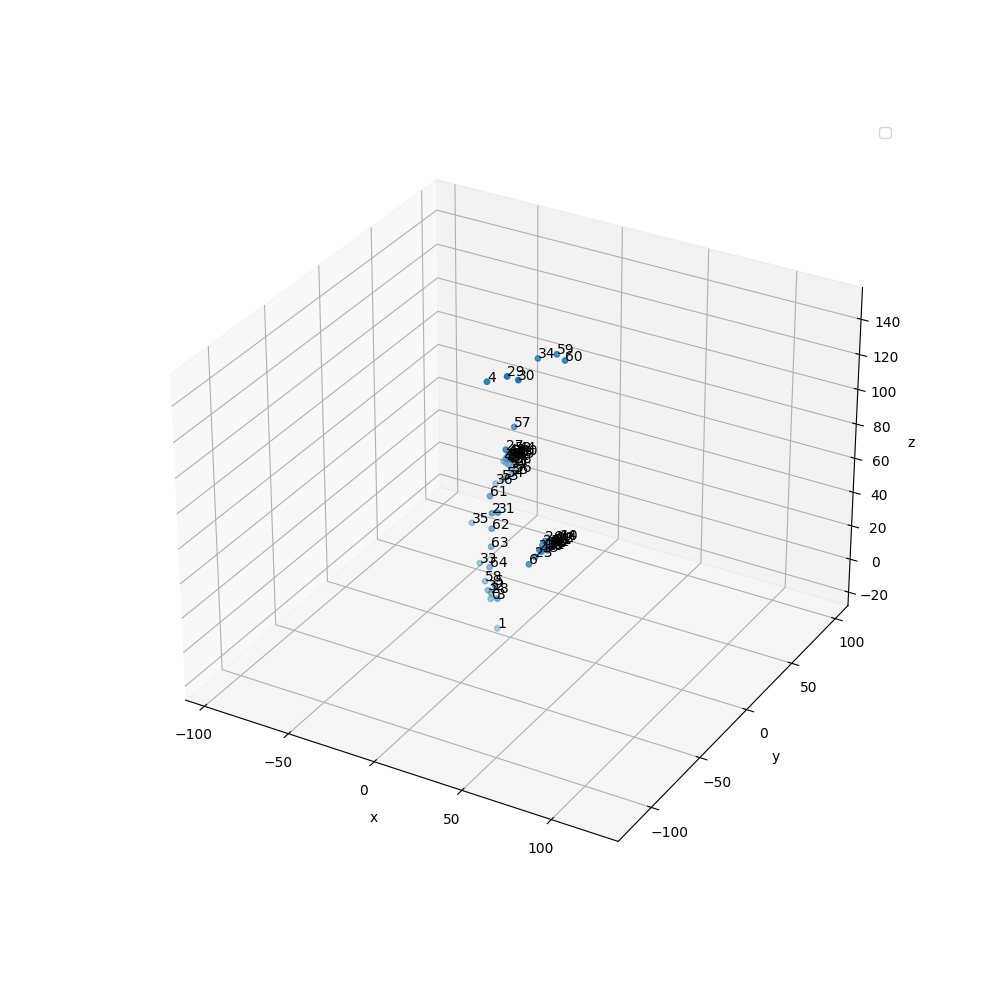

In [ ]:
%matplotlib widget
temp_3d_coords=temp_json['pts3d_fisheye']
x=temp_3d_coords[0]
y=temp_3d_coords[1]
z=temp_3d_coords[2]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker='o',s=15)
ax.set_aspect('equal')
for i,(x,y,z) in enumerate(zip(x,y,z)):
    if i==2:
        print(x,y,z)
    ax.text(x,y,z,str(i))

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
import transformations
data=temp_json

Khmc = np.array([[352.59619801644876, 0.0, 0.0],
	              [0.0, 352.70276325061578, 0.0],
	              [654.6810228318458, 400.952228031277, 1.0]]).T
kd = np.array([-0.05631891929412012, -0.0038333424842925286,
                -0.00024681888617308917, -0.00012153386798050158])

Mmaya = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, -1, 0],
                  [0, 0, 0, 1]])


h_fov = np.array(data['camera']['cam_fov'])
translation = np.array(data['camera']['trans'])
rotation = np.array(data['camera']['rot']) * np.pi / 180.0

Mf = transformations.euler_matrix(rotation[0],
                                  rotation[1],
                                  rotation[2],
                                  'sxyz')

Mf[0:3, 3] = translation # rotation+translation
Mf = np.linalg.inv(Mf) # inverse (passive transformation)
M = Mmaya.T.dot(Mf)

joints = np.vstack([j['trans'] for j in data['joints']]).T
print(joints.shape)
Xj = M[0:3, 0:3].dot(joints) + M[0:3, 3:4] # camera coordinate

pts2d, jac = cv2.fisheye.projectPoints(
    Xj.T.reshape((1, -1, 3)).astype(np.float32), # pts3d_fisheye
    (0, 0, 0),
    (0, 0, 0),
    Khmc, # intrinsic matrix
    kd # distortion coefficients
)
pts2d = pts2d.T.reshape((2, -1))
Khmc
pts2d.shape

(3, 65)


(2, 65)

In [ ]:
temp_point=torch.tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
                        [ 7.9453e-02, -5.4082e-02,  6.4116e-03],
                        [-7.9627e-02, -5.3515e-02, -1.6271e-02],
                        [ 1.2453e-03,  9.5973e-02, -1.0986e-02],
                        [ 1.3244e-01, -4.2626e-01, -2.5596e-03],
                        [-1.3746e-01, -4.2498e-01, -1.1805e-02],
                        [ 2.2664e-03,  2.0787e-01, -2.4476e-02],
                        [ 1.8351e-01, -8.0126e-01, -4.7891e-02],
                        [-1.9466e-01, -8.0160e-01, -2.3055e-02],
                        [ 2.5768e-03,  3.3556e-01, -4.1411e-02],
                        [ 1.8257e-01, -8.9421e-01,  8.8463e-02],
                        [-1.9853e-01, -8.9382e-01,  1.0748e-01],
                        [ 6.3130e-04,  5.4295e-01, -5.5976e-02],
                        [ 6.0450e-02,  4.6118e-01, -5.5195e-02],
                        [-5.4549e-02,  4.6057e-01, -6.3772e-02],
                        [-2.6450e-02,  7.6030e-01, -3.7175e-02],
                        [ 1.8074e-01,  4.2469e-01, -4.4385e-02],
                        [-1.7474e-01,  4.2281e-01, -7.0614e-02],
                        [ 2.0071e-01,  4.0010e-01,  1.7880e-01],
                        [-1.4875e-01,  3.6326e-01,  1.4529e-01],
                        [ 2.0352e-01,  6.4449e-01,  2.3884e-01],
                        [-1.9428e-01,  6.0358e-01,  1.9011e-01],
                        [ 2.1977e-01,  7.3966e-01,  2.3393e-01],
                        [-2.2157e-01,  6.9134e-01,  1.8885e-01]]],dtype=torch.float).squeeze(0).T

Mf = transformations.euler_matrix(4.5341,
                                  -0.4861,
                                  0.0786,
                                  'sxyz')
Mf # zyx 인데 왜 sxyz임?;;
Mf = np.linalg.inv(Mf) # inverse (passive transformation)
M = Mmaya.T.dot(Mf)
M

M[0:3, 0:3].dot(temp_point)
print(
M[0:3, 0:3].dot(temp_point))
M=torch.tensor(M,dtype=torch.float)


[[ 0.          0.06927322 -0.08150248  0.00262798  0.08594855 -0.15618032
   0.00499403  0.08375146 -0.23800031  0.0062206   0.14017201 -0.1868302
   0.01209904  0.05951325 -0.04589989  0.0121014   0.16805764 -0.15765796
   0.28822055 -0.03801743  0.33571336 -0.04052608  0.35434982 -0.05907639]
 [ 0.          0.03955432 -0.01591878 -0.00335557  0.12474976  0.00514581
  -0.00687865  0.24107557  0.04090985 -0.00996175  0.13506149 -0.06152734
  -0.02738609  0.01169038 -0.03507242 -0.08711625  0.06422886 -0.0805701
  -0.11708356 -0.24778508 -0.20238503 -0.34210036 -0.2038282  -0.36624013]
 [ 0.          0.0539947   0.05072473 -0.0965137   0.41987478  0.41859748
  -0.20914563  0.78285076  0.78909366 -0.33791136  0.89603526  0.90066039
  -0.54500642 -0.46444504 -0.46457542 -0.75657251 -0.42735215 -0.42771617
  -0.368177   -0.33518772 -0.60014093 -0.56526129 -0.69498872 -0.65198679]]


In [ ]:

print(M[0:3, 0:3].unsqueeze(0).shape,temp_point.unsqueeze(0).shape)

torch.einsum('bij,bkj->bki', M[0:3, 0:3].unsqueeze(0), temp_point.T.unsqueeze(0))

torch.Size([1, 3, 3]) torch.Size([1, 3, 24])


tensor([[[ 0.0000,  0.0000,  0.0000],
         [ 0.0693,  0.0396,  0.0540],
         [-0.0815, -0.0159,  0.0507],
         [ 0.0026, -0.0034, -0.0965],
         [ 0.0859,  0.1247,  0.4199],
         [-0.1562,  0.0051,  0.4186],
         [ 0.0050, -0.0069, -0.2091],
         [ 0.0838,  0.2411,  0.7829],
         [-0.2380,  0.0409,  0.7891],
         [ 0.0062, -0.0100, -0.3379],
         [ 0.1402,  0.1351,  0.8960],
         [-0.1868, -0.0615,  0.9007],
         [ 0.0121, -0.0274, -0.5450],
         [ 0.0595,  0.0117, -0.4644],
         [-0.0459, -0.0351, -0.4646],
         [ 0.0121, -0.0871, -0.7566],
         [ 0.1681,  0.0642, -0.4274],
         [-0.1577, -0.0806, -0.4277],
         [ 0.2882, -0.1171, -0.3682],
         [-0.0380, -0.2478, -0.3352],
         [ 0.3357, -0.2024, -0.6001],
         [-0.0405, -0.3421, -0.5653],
         [ 0.3543, -0.2038, -0.6950],
         [-0.0591, -0.3662, -0.6520]]])

In [ ]:
 M[0:3, 0:3].unsqueeze(0)

tensor([[[ 0.8814,  0.0694,  0.4672],
         [ 0.4723, -0.1407, -0.8701],
         [-0.0053, -0.9876,  0.1568]]])

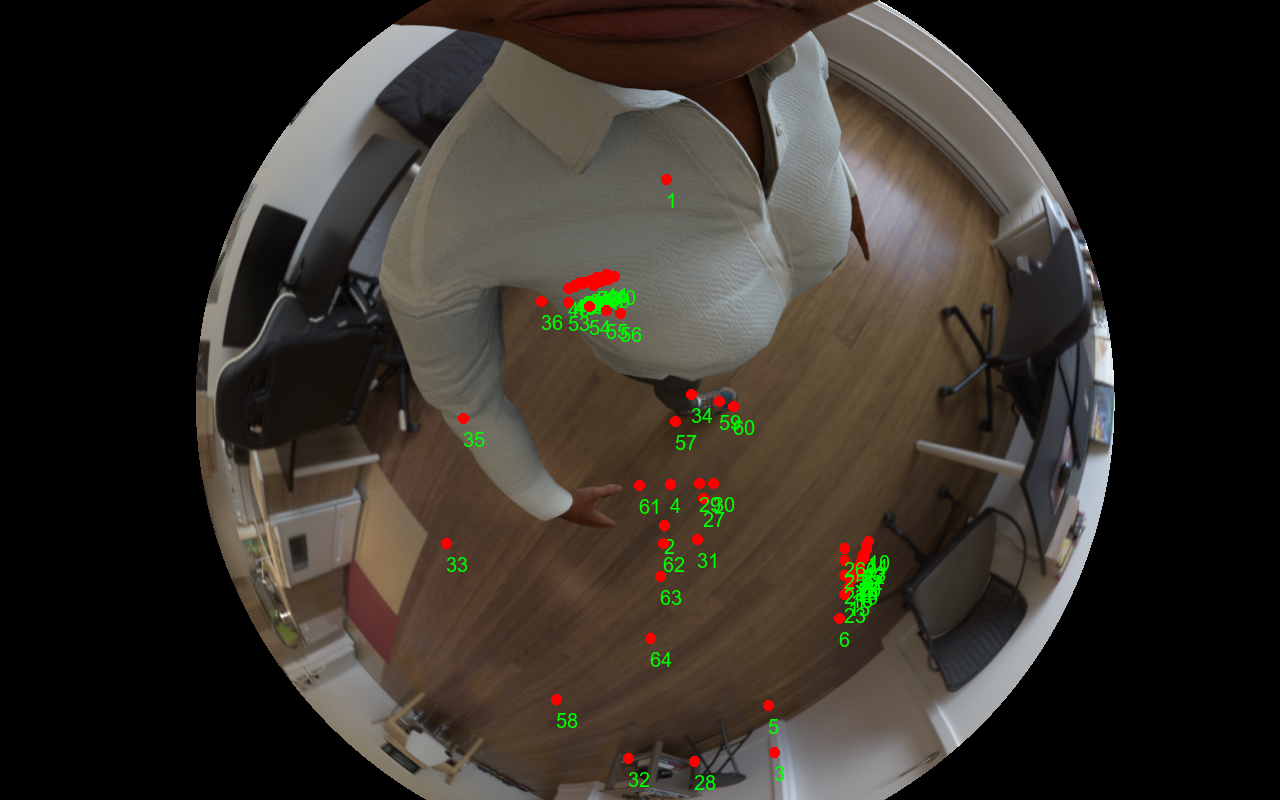

In [ ]:
temp_2d_coords=pts2d

tempimg=Image.open(temp_rgbs)
draw_dot(tempimg,temp_2d_coords,'None')

In [ ]:

joints_dict = {
    'Hips': {'parent': None, 'col': 0},
    'Spine': {'parent': 'Hips', 'col': 0},
    'Spine1': {'parent': 'Spine', 'col': 0},
    'Spine2': {'parent': 'Spine1', 'col': 0},
    'Neck': {'parent': 'Spine2', 'col': 5},
    'Head': {'parent': 'Neck', 'col': 5},
    'LeftShoulder': {'parent': 'Spine2', 'col': 0},
    'LeftArm': {'parent': 'LeftShoulder', 'col': 3},
    'LeftForeArm': {'parent': 'LeftArm', 'col': 3},
    'LeftHand': {'parent': 'LeftForeArm', 'col': 4},
    'RightShoulder': {'parent': 'Spine2', 'col': 0},
    'RightArm':  {'parent': 'RightShoulder', 'col': 1},
    'RightForeArm':  {'parent': 'RightArm', 'col': 1},
    'RightHand':  {'parent': 'RightForeArm', 'col': 2},
    'LeftUpLeg': {'parent': 'Hips', 'col': 8},
    'LeftLeg': {'parent': 'LeftUpLeg', 'col': 8},
    'LeftFoot': {'parent': 'LeftLeg', 'col': 9},
    'LeftToeBase': {'parent': 'LeftFoot', 'col': 9},
    'RightUpLeg': {'parent': 'Hips', 'col': 6},
    'RightLeg': {'parent': 'RightUpLeg', 'col': 6},
    'RightFoot': {'parent': 'RightLeg', 'col': 7},
    'RightToeBase': {'parent': 'RightFoot', 'col': 7},
}


In [ ]:
temp_json['joints']

[{'name': 'mixamorig:Head',
  'rot': [-39.222410926551575, -102.03741288591232, 40.07928303855523],
  'trans': [1.1241525411605837, 144.26296997070315, 0.8434561491012581]},
 {'name': 'mixamorig:HeadTop_End',
  'rot': [140.7775890734484, -77.96258711408768, -139.9207169614447],
  'trans': [-5.800824984775931, 165.06605696164422, 2.5696971797764134]},
 {'name': 'mixamorig:Hips',
  'rot': [7.948536305052066, -53.05444887432833, -2.2455681822562146],
  'trans': [4.397871017456055, 92.21813201904297, -3.3562285900115967]},
 {'name': 'mixamorig:LeftArm',
  'rot': [165.84888639526753, -2.335291017177967, 34.87927604420326],
  'trans': [12.066659927368162, 132.548828125, 12.689495086669918]},
 {'name': 'mixamorig:LeftFoot',
  'rot': [53.306483868167845, 6.690417434480931, 189.09468432399927],
  'trans': [17.936361312866214, 10.46090698242189, -7.502362728118891]},
 {'name': 'mixamorig:LeftForeArm',
  'rot': [139.61905931970236, -16.41413102712392, -5.667647384298879],
  'trans': [23.490402221

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


4.397871017456055 92.21813201904297 -3.3562285900115967


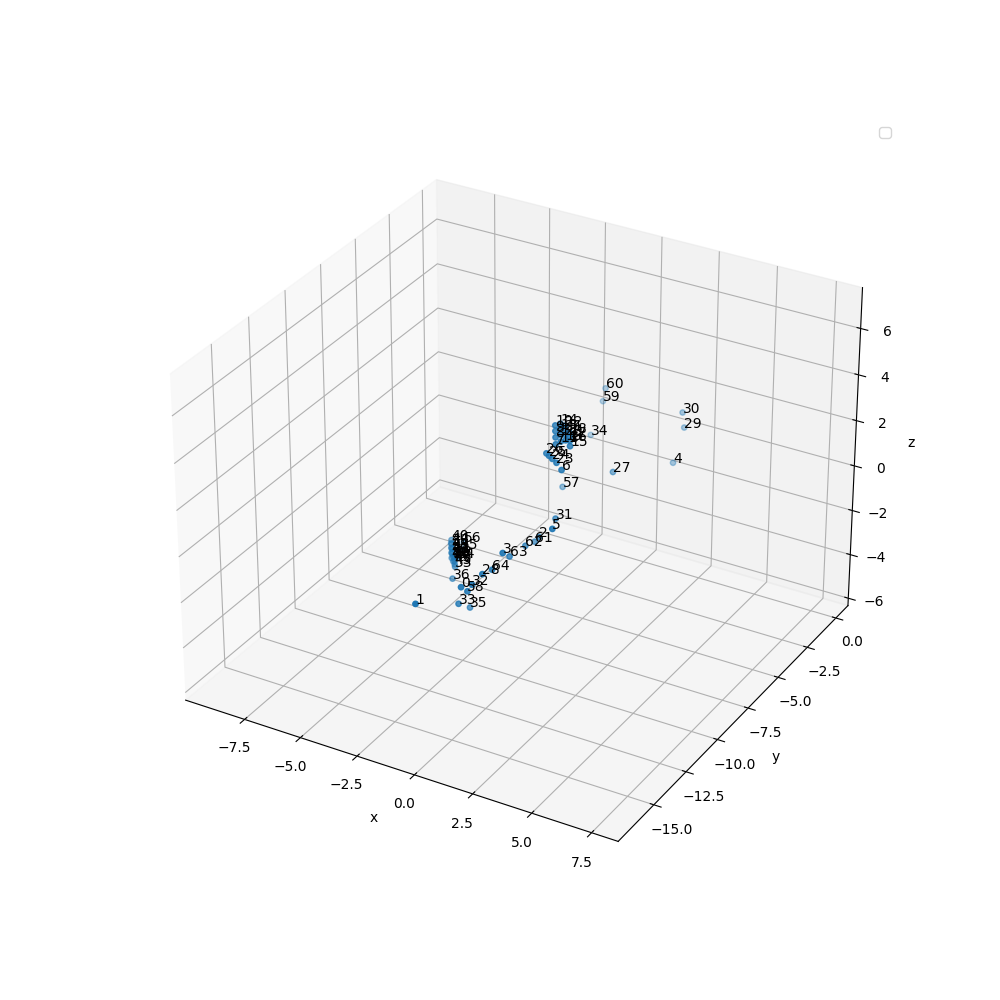

In [ ]:

x=joints[0]
y=joints[1]
z=joints[2]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x*.1,(-y)*.1,z*.1,marker='o',s=15)
ax.set_aspect('equal')
for i,(x,y,z) in enumerate(zip(x,y,z)):
    if i==2:
        print(x,y,z)
    ax.text(x*0.1,(-y)*0.1,z*0.1,str(i))

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

[18.0126 17.935  18.0872 18.003  17.8835 18.1576 17.9919 17.8139 18.2187
 17.9793 17.893  18.2974 17.9685 17.9087 18.0232 18.0023 17.7907 18.145
 17.8954 18.2401 17.9206 18.3074 17.8988 18.3331] [-73.118  -73.1649 -73.0523 -73.1143 -73.1566 -72.9969 -73.109  -73.1086
 -72.9249 -73.1008 -73.2454 -73.054  -73.1    -73.128  -73.0547 -73.1214
 -73.2038 -72.9775 -73.4503 -73.217  -73.5346 -73.2576 -73.5458 -73.2478]
18.0126 -73.118
17.935 -73.1649
18.0872 -73.0523
18.003 -73.1143
17.8835 -73.1566
18.1576 -72.9969
17.9919 -73.109
17.8139 -73.1086
18.2187 -72.9249
17.9793 -73.1008
17.893 -73.2454
18.2974 -73.054
17.9685 -73.1
17.9087 -73.128
18.0232 -73.0547
18.0023 -73.1214
17.7907 -73.2038
18.145 -72.9775
17.8954 -73.4503
18.2401 -73.217
17.9206 -73.5346
18.3074 -73.2576
17.8988 -73.5458
18.3331 -73.2478


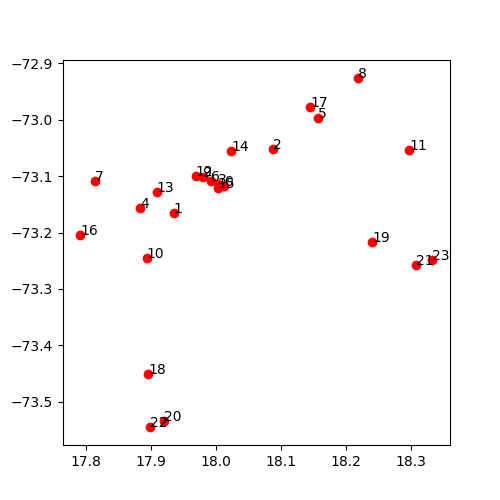

In [ ]:
temp_projection=torch.tensor([[[ 18.0126, -73.1180,   1.0000],
         [ 17.9350, -73.1649,   1.0000],
         [ 18.0872, -73.0523,   1.0000],
         [ 18.0030, -73.1143,   1.0000],
         [ 17.8835, -73.1566,   1.0000],
         [ 18.1576, -72.9969,   1.0000],
         [ 17.9919, -73.1090,   1.0000],
         [ 17.8139, -73.1086,   1.0000],
         [ 18.2187, -72.9249,   1.0000],
         [ 17.9793, -73.1008,   1.0000],
         [ 17.8930, -73.2454,   1.0000],
         [ 18.2974, -73.0540,   1.0000],
         [ 17.9685, -73.1000,   1.0000],
         [ 17.9087, -73.1280,   1.0000],
         [ 18.0232, -73.0547,   1.0000],
         [ 18.0023, -73.1214,   1.0000],
         [ 17.7907, -73.2038,   1.0000],
         [ 18.1450, -72.9775,   1.0000],
         [ 17.8954, -73.4503,   1.0000],
         [ 18.2401, -73.2170,   1.0000],
         [ 17.9206, -73.5346,   1.0000],
         [ 18.3074, -73.2576,   1.0000],
         [ 17.8988, -73.5458,   1.0000],
         [ 18.3331, -73.2478,   1.0000]]])


x=temp_projection[0,:,0].numpy()
y=temp_projection[0,:,1].numpy()
print(x,y)
fig,ax = plt.subplots(1,1,figsize=(5, 5))
for i,(x_,y_) in enumerate(zip(x,y)):
    print(x_,y_)
    ax.scatter(x_,y_,c='r')
    ax.annotate(str(i), (x_, y_))



In [ ]:

torch.stack([torch.eye(4) for _ in range(5)],dim=0)

[tensor(1.), tensor(1.), tensor(1.), tensor(1.), tensor(1.)]